<a href="https://www.kaggle.com/code/shruthiiiee/diamond-price-prediction-notebook?scriptVersionId=167316617" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# EDA

In [2]:
data = pd.read_csv("../input/diamonds/diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [5]:
data.drop_duplicates(inplace=True)

# Visualization 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


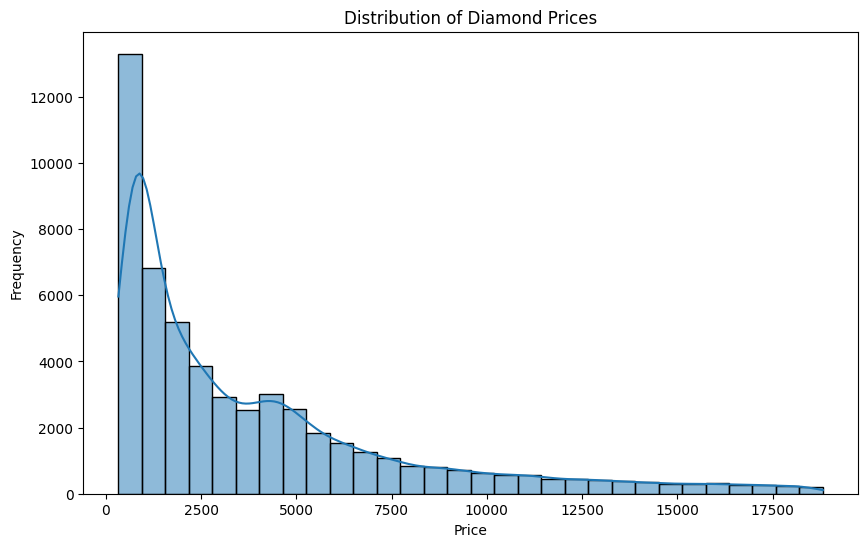

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

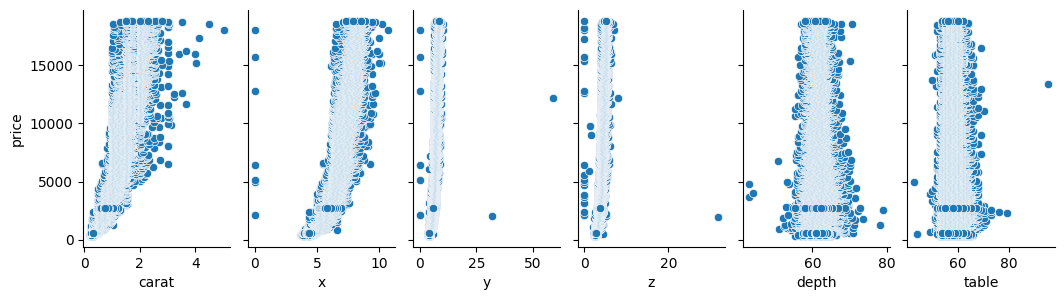

In [7]:
sns.pairplot(data, x_vars=['carat', 'x', 'y', 'z', 'depth', 'table'], y_vars=['price'], kind='scatter', height=3, aspect=0.6)
plt.show()

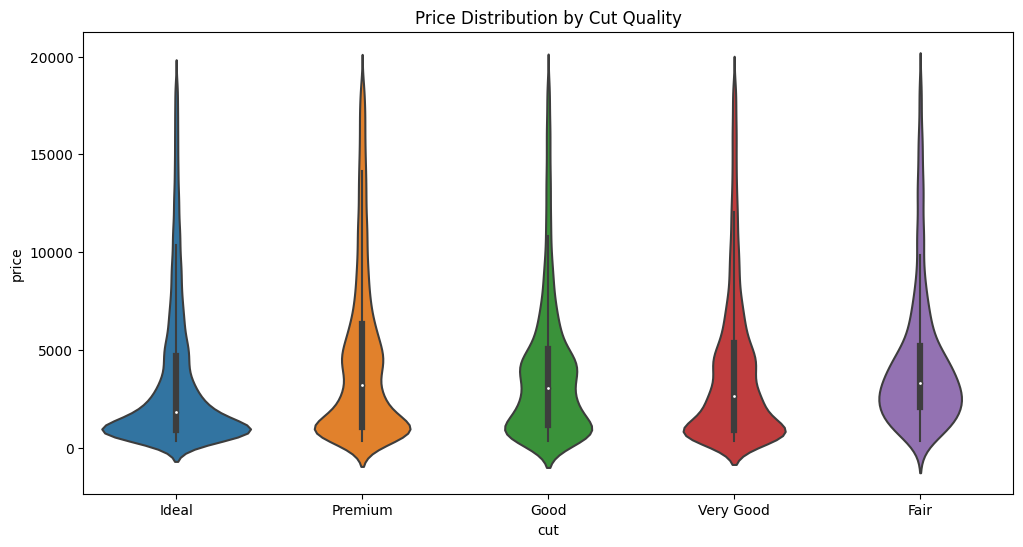

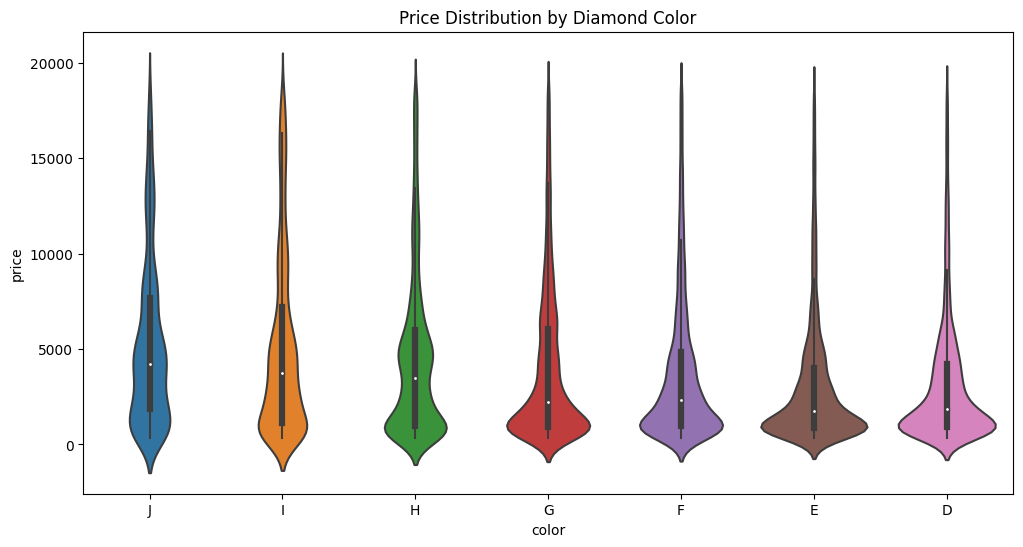

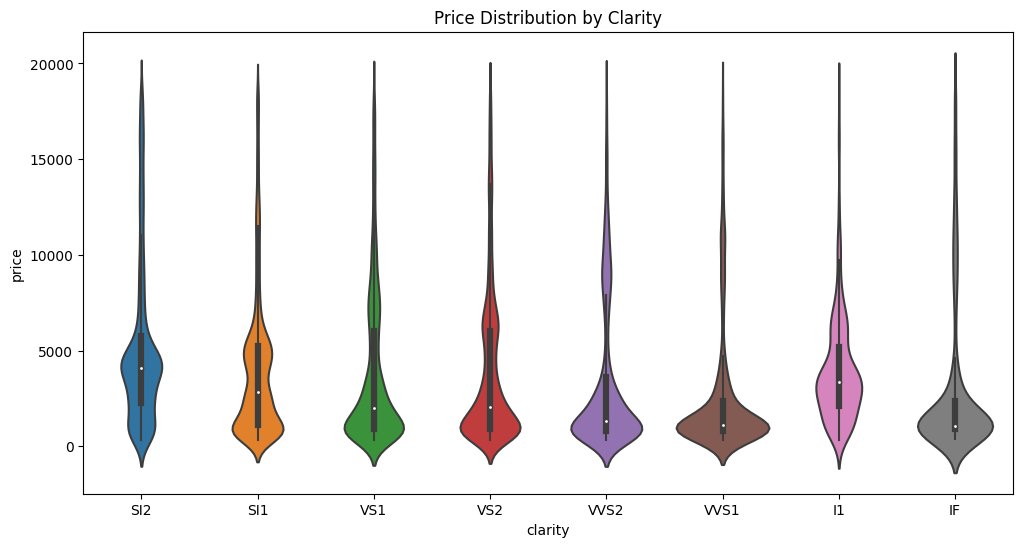

In [8]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='cut', y='price')
plt.title('Price Distribution by Cut Quality')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='color', y='price', order=['J', 'I', 'H', 'G', 'F', 'E', 'D'])
plt.title('Price Distribution by Diamond Color')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='clarity', y='price')
plt.title('Price Distribution by Clarity')
plt.show()

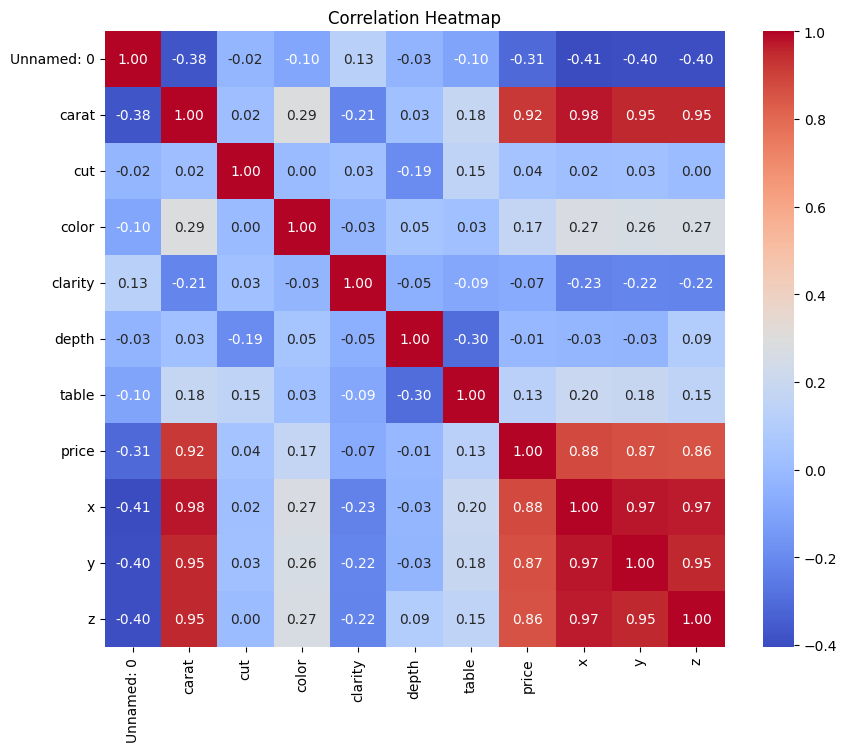

In [9]:
warnings.filterwarnings("ignore")
dt = (data.dtypes == "object")
object_cols = list(dt[dt].index)
label_data = data.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
correlation_matrix = label_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

In [10]:
data_encoded = data.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

X = data_encoded.drop(columns=['price'])
y = data_encoded['price']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
column_transformer = ColumnTransformer(
    [('onehot', OneHotEncoder(), object_cols)],
    remainder='passthrough'
)

In [13]:
X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

# Model Training and Evaluation

In [14]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_encoded, y_train)

RandomForestRegressor(random_state=42)

In [15]:
cv_scores = cross_val_score(rf_regressor, X_train_encoded, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.9998725  0.99994062 0.99993596 0.99995304 0.99988655]
Mean CV Score: 0.9999177343479773


Model Evaluation on Training Set

In [16]:
y_train_pred = rf_regressor.predict(X_train_encoded)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print("\nTraining Set Metrics:")
print("Mean Absolute Error:", train_mae)
print("Mean Squared Error:", train_mse)
print("R-squared Score:", train_r2)


Training Set Metrics:
Mean Absolute Error: 1.1744549499443937
Mean Squared Error: 131.74826960975156
R-squared Score: 0.9999917242191139


Model Evaluation on Test Set

In [17]:
y_test_pred = rf_regressor.predict(X_test_encoded)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nTest Set Metrics:")
print("Mean Absolute Error:", test_mae)
print("Mean Squared Error:", test_mse)
print("R-squared Score:", test_r2)


Test Set Metrics:
Mean Absolute Error: 2.7642473118279653
Mean Squared Error: 442.82563909899886
R-squared Score: 0.9999721437621693


# Conclusion

A Random Forest Regressor model was trained on the training data, and its performance was evaluated using cross-validation scores and metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared on both the training and test sets.

The model exhibited excellent performance with high R-squared scores on both training and test sets, indicating a good fit to the data and strong predictive capability.

In conclusion, this notebook provides insights into diamond price prediction and demonstrates the effectiveness of Random Forest Regression in accurately predicting diamond prices based on their characteristics.


> Your time spent exploring this notebook is valued! ˎˊ˗⋆｡°✩📄
If you've found it insightful and beneficial, please consider giving it an Upvote. Don't hesitate to share your analysis ideas in the comments below. Until next time, happy analyzing